### Implementation of DecisionTree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from public_tests import *
%matplotlib inline

数据集解释如下：

        此数据集为蘑菇特征数据集，蘑菇有3个特征，依此判断此蘑菇为可使用还是不可食用
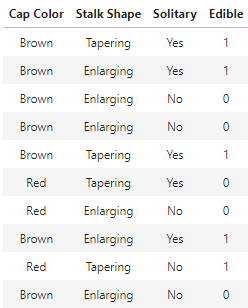
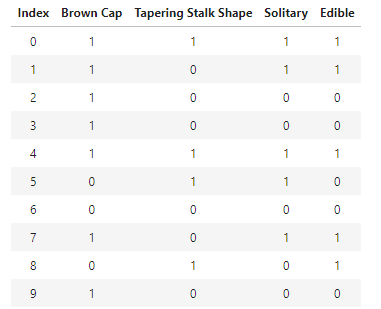

In [2]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

In [3]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


In [4]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


计算当前节点的信息熵

In [6]:
# UNQ_C1
# GRADED FUNCTION: compute_entropy

def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray):
       当前节点样本的标签
       Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    # You need to return the following variables correctly
    entropy = 0.
    
    ### START CODE HERE ###
    
    if len(y)!=0:
        p1=len(y[y==1])/len(y)
        if p1==0 or p1==1:
            return 0
        entropy= -p1*np.log2(p1)-(1-p1)*np.log2(1-p1)
    else:
        return 0
    
    ### END CODE HERE ###        
    
    return entropy

In [7]:
# Compute entropy at the root node (i.e. with all examples)
# Since we have 5 edible and 5 non-edible mushrooms, the entropy should be 1"

print("Entropy at root node: ", compute_entropy(y_train)) 

# UNIT TESTS
compute_entropy_test(compute_entropy)

Entropy at root node:  1.0
 All tests passed.


划分节点产生左右子树

In [8]:
# UNQ_C2
# GRADED FUNCTION: split_dataset
#针对当前节点进行划分左右子集
def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (ndarray):  List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (ndarray): Indices with feature value == 1
        right_indices (ndarray): Indices with feature value == 0
    """
    
    # You need to return the following variables correctly
    left_indices = []
    right_indices = []
    
    ### START CODE HERE ###
    
    #遍历当前节点的所有数据
    for index in node_indices:
        #依据每个数据在特征feature上的表现进行左右子树划分
        if X[index][feature]==1:
            left_indices.append(index)
        else:
            right_indices.append(index)
    
    ### END CODE HERE ###
        
    return left_indices, right_indices

In [9]:
#构造根节点索引列表
root_indices = [i for i in range(len(X_train))]

# Feel free to play around with these variables
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("Left indices: ", left_indices)
print("Right indices: ", right_indices)

# UNIT TESTS    
split_dataset_test(split_dataset)

Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]
 All tests passed.


计算信息增益

In [10]:
# UNQ_C3
# GRADED FUNCTION: compute_information_gain
#计算当前节点的信息增益
def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        cost (float):        Cost computed
    
    """    
    # Split dataset依据特征feature划分左右节点
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    # You need to return the following variables correctly
    information_gain = 0
    
    ### START CODE HERE ###
    
    # 计算左右子节点权重
    W_left=len(left_indices)/len(node_indices)
    W_right=len(right_indices)/len(node_indices)
   
    #Weighted entropy
    #计算左右子节点的信息熵
    H_left=compute_entropy(y_left)
    H_right=compute_entropy(y_right)
    
    W_H_left=W_left*H_left
    W_H_right=W_right*H_right
    
    #Information gain                                                   
    H=compute_entropy(y_node)
    information_gain=H-(W_H_left+W_H_right)
    ### END CODE HERE ###  
    
    return information_gain

In [11]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)
    
info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

# UNIT TESTS
compute_information_gain_test(compute_information_gain)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
 All tests passed.


实现最大信息增益划分节点

In [12]:
# UNQ_C4
# GRADED FUNCTION: get_best_split
#对当前节点进行最大信息增益特征的选取
def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    
    
    # Some useful variables
    num_features = X.shape[1]
    
    # You need to return the following variables correctly
    best_feature = -1
    
    ### START CODE HERE ###
    
    #最大信息增益
    max_info_gain=0
    
    '''在此遍历全部特征即可寻找最优的下一个划分特征，无需避开之前使用过
    的划分特征,因为当前节点全是之前划分节点的产物,比如父节点依据特征A划分，
    当前节点为父节点的左子节点，特征A值全部为1，那么再次依据此特征划分，
    所得的结果一边全部为当前节点照搬，另一边一个样本没有（因为当前节点没有
    特征A值为0的样本，全是特征A值为1）,因此对于之前父节点使用过的划分特征
    获得的信息增益为0，必然不会选
    '''
    for feature in range(num_features):
        info_gain=compute_information_gain(X,y,node_indices,feature)
        #发现更优的信息增益，进行更新
        if info_gain>max_info_gain:
            max_info_gain=info_gain
            best_feature=feature
    
    ### END CODE HERE ##    
   
    return best_feature,max_info_gain

In [13]:
best_feature,max_info_gain = get_best_split(X_train, y_train, root_indices)
print("Best feature to split on: %d" % best_feature)

# UNIT TESTS
get_best_split_test(get_best_split)

Best feature to split on: 2


AssertionError: When the target variable is pure, there is no best split to do. Expected -1, got (-1, 0)

构建完整的ID3决策树

In [15]:
#初始化决策树
tree=[]
Root=[]
#构建决策树函数
def build_tree_recursive(X,y,Root,node_indices,branch_name,max_depth,current_depth,threshold):
    """
    使用递归构建决策树
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 
    
    # 先判断是否到达最大树深，若到达终止划分
    if current_depth==max_depth:
        formatting="  "*current_depth+"-"*current_depth
        print(formatting,"%s 叶子节点的索引"%branch_name,node_indices,"种类为 %s"%y_train[node_indices[0]])
        #把当前叶子节点的分类结果存入树结构中
        Root.append(("种类为 %s"%y_train[node_indices[0]]))
        return
    
    # 于当前节点获取最大信息增益特征
    best_feature,max_info_gain=get_best_split(X,y,node_indices)
    
    #若信息增益太小了不再划分
    if max_info_gain<=threshold:
        formatting=" "*current_depth+"-"*current_depth
        print(formatting,"%s 叶子节点的索引"%branch_name,node_indices,"种类为 %s"%y_train[node_indices[0]])
        #把当前叶子节点的分类结果存入树结构中
        Root.append(("种类为 %s"%y_train[node_indices[0]]))
        return 
    
    #记录当前节点的划分特征
    Root.append(best_feature)
    #添加左子树和右子树节点
    Root.append([])
    Root.append([])
    
    tree.append([current_depth, branch_name, best_feature, node_indices])
    formatting = "-"*current_depth
    print("%s 深度 %d, %s: 划分特征: %d" % (formatting, current_depth, branch_name, best_feature))
    
    #依据最大信息增益的特征划分当前数据集
    left_indices,right_indices=split_dataset(X,node_indices,best_feature)
    
    
    #递归对左右子树划分
    build_tree_recursive(X,y,Root[1],left_indices,"左子树",max_depth,current_depth+1,threshold)
    build_tree_recursive(X,y,Root[2],right_indices,"右子树",max_depth,current_depth+1,threshold)

#构建决策树    
build_tree_recursive(X_train,y_train,Root,root_indices,"根节点",max_depth=3,current_depth=0,threshold=1e-3)    

 深度 0, 根节点: 划分特征: 2
- 深度 1, 左子树: 划分特征: 0
  -- 左子树 叶子节点的索引 [0, 1, 4, 7] 种类为 1
  -- 右子树 叶子节点的索引 [5] 种类为 0
- 深度 1, 右子树: 划分特征: 1
  -- 左子树 叶子节点的索引 [8] 种类为 1
  -- 右子树 叶子节点的索引 [2, 3, 6, 9] 种类为 0


In [17]:
tree

[[0, '根节点', 2, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
 [1, '左子树', 0, [0, 1, 4, 5, 7]],
 [1, '右子树', 1, [2, 3, 6, 8, 9]]]

In [18]:
y_train

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [158]:
Root

[2, [0, ['种类为 1'], ['种类为 0']], [1, ['种类为 1'], ['种类为 0']]]

### 决策树成功构建完毕，接下来通过决策树对不同的数据样本进行分类

In [107]:
#利用决策树实现单样本分类
def classification_One(x,Root,pos):
    #传入需要预测的数据x,决策树的根节点Root
    #首先判断Root[0]是否为特征值
    if str.isdigit('%s'%Root[0]):
        #当前特征的值为1进入左子树
        if x[Root[0]]==1:
            pos=Root[1]
            pos=Test(x,Root[1],pos)
        #当前特征的值为0进入右子树
        else:
            pos=Root[2]
            pos=Test(x,Root[2],pos)
    return pos

In [108]:
#实现多样本分类
def Classification(X,Root):
    res=[]
    for x in X:
        pos=classification_One(x,Root,[])
        res.append(pos)
    return res

构建三个测试数据集

In [109]:
test_x1=np.array([0,0,1])
test_x2=np.array([1,0,1])
test_X=np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])

In [110]:
pos1=[]
pos1=classification_One(test_x1,Root,pos1)
print(pos1)

['种类为 0']


In [111]:
pos2=[]
pos2=classification_One(test_x2,Root,pos2)
print(pos2)

['种类为 1']


In [112]:
Classification(test_X,Root)

[['种类为 1'],
 ['种类为 1'],
 ['种类为 0'],
 ['种类为 0'],
 ['种类为 1'],
 ['种类为 0'],
 ['种类为 0'],
 ['种类为 1'],
 ['种类为 1'],
 ['种类为 0']]

In [113]:
y_train

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

完成！